In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_style('whitegrid')
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 100)


In [2]:
# Read the CSV into a Pandas DataFrame
fantasy_df = pd.read_csv("../Data/testdata2.csv")

# Print the first five rows of data to the screen
fantasy_df.head()

,Player_Name,Team,Win,Start,Minutes,FDP,DoubleD,TripleD,FD_Sal,FD_pos,ADI,VMI,pt,rb,as,st,bl,to,trey,fg,FGM,FG%,ft,FTM,FT%,ranking
0,Aaron Gordon,orl,Lose,1,34.166667,37.5,0,0,5600,4,66.25,0.00,24,5,1,2,0,0,4,20-Sep,9,0.45,3-Feb,2,0.666667,Advanced
1,Aaron Holiday,ind,Lose,0,26.683333,24.2,0,0,4100,1,66.94,-3.60,17,1,4,0,0,0,3,11-Jul,7,0.00,0,0,0.000000,AboveAVG
2,Abdel Nader,okc,Win,0,10.866667,4.0,0,0,3500,3,63.28,1.15,2,0,0,0,1,1,0,3-Jan,1,0.00,0,0,0.000000,belowAVG
3,Adam Mokoka,chi,Lose,0,4.433333,2.4,0,0,3500,2,63.10,2.65,0,2,0,0,0,0,0,0-2,0,0.00,0,0,0.000000,belowAVG
4,Admiral Schofield,was,Win,0,2.600000,4.2,0,0,3700,3,67.94,-1.59,0,1,0,1,0,0,0,0,0,0.00,0,0,0.000000,belowAVG


In [9]:
fantasy_df.describe()

,Start,Minutes,FDP,DoubleD,TripleD,FD_Sal,FD_pos,ADI,VMI,pt,rb,as,st,bl,to,trey,FGM,FG%,FTM,FT%
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,0.375502,18.329451,16.772490,0.062249,0.004016,4560.040161,2.841365,64.776165,-0.261807,8.034137,3.506024,1.757028,0.574297,0.385542,0.983936,0.841365,2.495984,0.180559,1.220884,0.360022
std,0.484739,11.412868,14.401984,0.241850,0.063309,1659.431189,1.321900,3.383218,4.113794,8.120127,3.467144,2.356378,0.864864,0.853418,1.225050,1.343041,2.520137,0.255337,1.854736,0.425519
min,0.000000,0.016667,-1.000000,0.000000,0.000000,0.000000,1.000000,43.970000,-17.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.079167,4.525000,0.000000,0.000000,3500.000000,2.000000,63.280000,-0.680000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,19.041667,13.800000,0.000000,0.000000,3800.000000,3.000000,65.430000,0.015000,6.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,1.000000,27.566667,25.450000,0.000000,0.000000,5000.000000,4.000000,66.940000,1.150000,12.000000,5.000000,2.000000,1.000000,0.000000,2.000000,1.000000,4.000000,0.384615,2.000000,0.800000
max,1.000000,45.083333,80.500000,1.000000,1.000000,11600.000000,5.000000,68.580000,21.090000,51.000000,21.000000,16.000000,4.000000,9.000000,7.000000,9.000000,9.000000,1.000000,9.000000,1.000000


In [14]:
fantasy_df.drop("FD_Sal", axis=1, inplace = True)

In [40]:
# Read the CSV into a Pandas DataFrame
fantasy2 = pd.read_csv("../Data/20200209__players.csv")

# Print the first five rows of data to the screen
fantasy2.head()

,Name,Last,First,Player_Name,Starter,FD_Pts,FD_Sal,Pos,Team,H/A,Oppt,Team Score,Oppt Score,Minutes,Stat line,Date
0,"Holiday, Jrue",Holiday,Jrue,Jrue Holiday,1.0,58.2,6800.0,SG,nor,A,ind,124,117.0,31.78,31pt 6rb 10as 3st 4to 4trey 10-22fg 7-8ft,20200208
1,"Murray, Jamal",Murray,Jamal,Jamal Murray,1.0,50.5,6400.0,PG,den,A,pho,117,108.0,35.27,36pt 5rb 5as 1st 1bl 5to 6trey 14-17fg 2-3ft,20200208
2,"Murray, Dejounte",Murray,Dejounte,Dejounte Murray,1.0,50.3,4900.0,PG,sas,A,sac,102,122.0,27.9,17pt 9rb 9as 3st 2trey 6-11fg 3-4ft,20200208
3,"Hield, Buddy",Hield,Buddy,Buddy Hield,NaN,49.7,5400.0,SG,sac,H,sas,122,102.0,31.9,31pt 6rb 5as 2st 2to 9trey 11-17fg,20200208
4,"LeVert, Caris",LeVert,Caris,Caris LeVert,1.0,48.6,5300.0,SG,bkn,A,tor,118,119.0,33.22,37pt 3rb 4as 1st 1to 6trey 12-18fg 7-7ft,20200208


In [41]:
fantasy2.columns

Index(['Name', 'Last', 'First', 'Player_Name', 'Starter', 'FD_Pts', 'FD_Sal',
       'Pos', 'Team', 'H/A', 'Oppt', 'Team Score', 'Oppt Score', 'Minutes',
       'Stat line', 'Date'],
      dtype='object')

In [42]:
drop1 = ['Name', 'Last', 'First', 'Starter', 'FD_Pts','Pos', 'Team', 'H/A', 'Oppt', 'Team Score', 'Oppt Score', 'Minutes',
       'Stat line', 'Date']
fantasy2.drop(drop1, axis=1, inplace = True)
fantasy2

,Player_Name,FD_Sal
0,Jrue Holiday,6800.0
1,Jamal Murray,6400.0
2,Dejounte Murray,4900.0
3,Buddy Hield,5400.0
4,Caris LeVert,5300.0
...,...,...
291,Bol Bol,3500.0
292,DeMarcus Cousins,3500.0
293,Marc Gasol,4600.0
294,Zach Norvell Jr.,NaN


In [43]:
fantasy3 = pd.merge(fantasy_df,fantasy2, on="Player_Name", how="inner")
fantasy3

,Player_Name,Team,Win,Start,Minutes,FDP,DoubleD,TripleD,FD_pos,ADI,VMI,pt,rb,as,st,bl,to,trey,fg,FGM,FG%,ft,FTM,FT%,ranking,FD_Sal
0,Aaron Gordon,orl,Lose,1,34.166667,37.5,0,0,4,66.25,0.00,24,5,1,2,0,0,4,20-Sep,9,0.450000,3-Feb,2,0.666667,Advanced,6500.0
1,Aaron Holiday,ind,Lose,0,26.683333,24.2,0,0,1,66.94,-3.60,17,1,4,0,0,0,3,11-Jul,7,0.000000,0,0,0.000000,AboveAVG,3800.0
2,Alen Smailagic,gsw,Lose,0,11.966667,9.7,0,0,4,67.62,-0.69,5,1,3,0,0,1,0,3-Feb,2,0.666667,1-Jan,1,1.000000,belowAVG,3500.0
3,Alex Caruso,lal,Win,0,16.183333,20.7,0,0,1,67.12,-0.68,13,1,1,2,0,1,3,6-May,5,0.833333,0-1,0,0.000000,AboveAVG,3500.0
4,Alex Len,atl,Lose,0,14.250000,16.8,0,0,5,63.37,0.40,0,4,0,1,3,0,0,0-3,0,0.000000,0,0,0.000000,Average,4300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Wilson Chandler,bkn,Lose,0,19.466667,5.6,0,0,3,65.70,1.46,2,3,0,0,0,0,0,0-1,0,0.000000,2-Feb,2,1.000000,belowAVG,3600.0
280,Yogi Ferrell,sac,Lose,0,7.666667,6.7,0,0,1,67.12,-0.28,3,1,3,0,0,2,0,5-Jan,1,0.200000,1-Jan,1,1.000000,belowAVG,3500.0
281,Zach Norvell Jr.,lal,Win,0,2.333333,0.0,0,0,2,64.88,0.55,0,0,0,0,0,0,0,0,0,0.000000,0,0,0.000000,belowAVG,NaN
282,Zion Williamson,nor,Lose,1,32.983333,37.5,1,0,4,66.62,-0.37,21,10,1,1,1,3,0,14-Aug,8,0.571429,7-May,5,0.714286,Advanced,7200.0


In [44]:
fantasy3.columns

Index(['Player_Name', 'Team', 'Win', 'Start', 'Minutes', 'FDP', 'DoubleD',
       'TripleD', 'FD_pos', 'ADI', 'VMI', 'pt', 'rb', 'as', 'st', 'bl', 'to',
       'trey', 'fg', 'FGM', 'FG%', 'ft', 'FTM', 'FT%', 'ranking', 'FD_Sal'],
      dtype='object')

In [45]:
fantasy3.corr()['FDP']

Start      0.571955
Minutes    0.814489
FDP        1.000000
DoubleD    0.529786
TripleD    0.273219
FD_pos     0.065765
ADI       -0.029362
VMI       -0.037212
pt         0.891880
rb         0.786283
as         0.659085
st         0.471849
bl         0.413193
to         0.440631
trey       0.491699
FGM        0.631533
FG%        0.321626
FTM        0.497667
FT%        0.359165
FD_Sal     0.751243
Name: FDP, dtype: float64

In [8]:
# fantasy_df.corr()['PFDP']

In [46]:
drop2 = ['TripleD', 'ADI', 'VMI', 'FG%', 'FT%']

In [47]:
fantasy3.pivot_table(index='FD_pos', values='FDP', aggfunc=np.mean)

,FDP
FD_pos,
1,18.176471
2,15.634615
3,14.658621
4,17.803226
5,21.422857


In [48]:
fantasy3.pivot_table(index='FD_pos', values='FDP', aggfunc=np.median)

,FDP
FD_pos,
1,18.50
2,12.60
3,9.95
4,16.60
5,16.80


In [49]:
fantasy3.drop(drop2, axis=1, inplace = True)
fantasy3

,Player_Name,Team,Win,Start,Minutes,FDP,DoubleD,FD_pos,pt,rb,as,st,bl,to,trey,fg,FGM,ft,FTM,ranking,FD_Sal
0,Aaron Gordon,orl,Lose,1,34.166667,37.5,0,4,24,5,1,2,0,0,4,20-Sep,9,3-Feb,2,Advanced,6500.0
1,Aaron Holiday,ind,Lose,0,26.683333,24.2,0,1,17,1,4,0,0,0,3,11-Jul,7,0,0,AboveAVG,3800.0
2,Alen Smailagic,gsw,Lose,0,11.966667,9.7,0,4,5,1,3,0,0,1,0,3-Feb,2,1-Jan,1,belowAVG,3500.0
3,Alex Caruso,lal,Win,0,16.183333,20.7,0,1,13,1,1,2,0,1,3,6-May,5,0-1,0,AboveAVG,3500.0
4,Alex Len,atl,Lose,0,14.250000,16.8,0,5,0,4,0,1,3,0,0,0-3,0,0,0,Average,4300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Wilson Chandler,bkn,Lose,0,19.466667,5.6,0,3,2,3,0,0,0,0,0,0-1,0,2-Feb,2,belowAVG,3600.0
280,Yogi Ferrell,sac,Lose,0,7.666667,6.7,0,1,3,1,3,0,0,2,0,5-Jan,1,1-Jan,1,belowAVG,3500.0
281,Zach Norvell Jr.,lal,Win,0,2.333333,0.0,0,2,0,0,0,0,0,0,0,0,0,0,0,belowAVG,NaN
282,Zion Williamson,nor,Lose,1,32.983333,37.5,1,4,21,10,1,1,1,3,0,14-Aug,8,7-May,5,Advanced,7200.0


In [50]:
fantasy3['FD_pos'] = fantasy3['FD_pos'].replace([1,2,3,4,5],['PG', 'SG', 'SF', 'PF', 'C'])


In [51]:
fantasy3['Player_Name'] = fantasy3['Player_Name'].replace(' ', '_', regex=True)
fantasy3

,Player_Name,Team,Win,Start,Minutes,FDP,DoubleD,FD_pos,pt,rb,as,st,bl,to,trey,fg,FGM,ft,FTM,ranking,FD_Sal
0,Aaron_Gordon,orl,Lose,1,34.166667,37.5,0,PF,24,5,1,2,0,0,4,20-Sep,9,3-Feb,2,Advanced,6500.0
1,Aaron_Holiday,ind,Lose,0,26.683333,24.2,0,PG,17,1,4,0,0,0,3,11-Jul,7,0,0,AboveAVG,3800.0
2,Alen_Smailagic,gsw,Lose,0,11.966667,9.7,0,PF,5,1,3,0,0,1,0,3-Feb,2,1-Jan,1,belowAVG,3500.0
3,Alex_Caruso,lal,Win,0,16.183333,20.7,0,PG,13,1,1,2,0,1,3,6-May,5,0-1,0,AboveAVG,3500.0
4,Alex_Len,atl,Lose,0,14.250000,16.8,0,C,0,4,0,1,3,0,0,0-3,0,0,0,Average,4300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Wilson_Chandler,bkn,Lose,0,19.466667,5.6,0,SF,2,3,0,0,0,0,0,0-1,0,2-Feb,2,belowAVG,3600.0
280,Yogi_Ferrell,sac,Lose,0,7.666667,6.7,0,PG,3,1,3,0,0,2,0,5-Jan,1,1-Jan,1,belowAVG,3500.0
281,Zach_Norvell_Jr.,lal,Win,0,2.333333,0.0,0,SG,0,0,0,0,0,0,0,0,0,0,0,belowAVG,NaN
282,Zion_Williamson,nor,Lose,1,32.983333,37.5,1,PF,21,10,1,1,1,3,0,14-Aug,8,7-May,5,Advanced,7200.0


In [53]:
fantasy3 = fantasy3.dropna()
fantasy3['FD_Sal'] = fantasy3['FD_Sal'].astype(int)
fantasy3

,Player_Name,Team,Win,Start,Minutes,FDP,DoubleD,FD_pos,pt,rb,as,st,bl,to,trey,fg,FGM,ft,FTM,ranking,FD_Sal
0,Aaron_Gordon,orl,Lose,1,34.166667,37.5,0,PF,24,5,1,2,0,0,4,20-Sep,9,3-Feb,2,Advanced,6500
1,Aaron_Holiday,ind,Lose,0,26.683333,24.2,0,PG,17,1,4,0,0,0,3,11-Jul,7,0,0,AboveAVG,3800
2,Alen_Smailagic,gsw,Lose,0,11.966667,9.7,0,PF,5,1,3,0,0,1,0,3-Feb,2,1-Jan,1,belowAVG,3500
3,Alex_Caruso,lal,Win,0,16.183333,20.7,0,PG,13,1,1,2,0,1,3,6-May,5,0-1,0,AboveAVG,3500
4,Alex_Len,atl,Lose,0,14.250000,16.8,0,C,0,4,0,1,3,0,0,0-3,0,0,0,Average,4300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,Willie_Cauley-Stein,dal,Win,1,25.900000,28.5,0,C,7,10,1,1,2,1,0,8-Mar,3,2-Jan,1,AboveAVG,3700
279,Wilson_Chandler,bkn,Lose,0,19.466667,5.6,0,SF,2,3,0,0,0,0,0,0-1,0,2-Feb,2,belowAVG,3600
280,Yogi_Ferrell,sac,Lose,0,7.666667,6.7,0,PG,3,1,3,0,0,2,0,5-Jan,1,1-Jan,1,belowAVG,3500
282,Zion_Williamson,nor,Lose,1,32.983333,37.5,1,PF,21,10,1,1,1,3,0,14-Aug,8,7-May,5,Advanced,7200


# Kernel Density Analysis


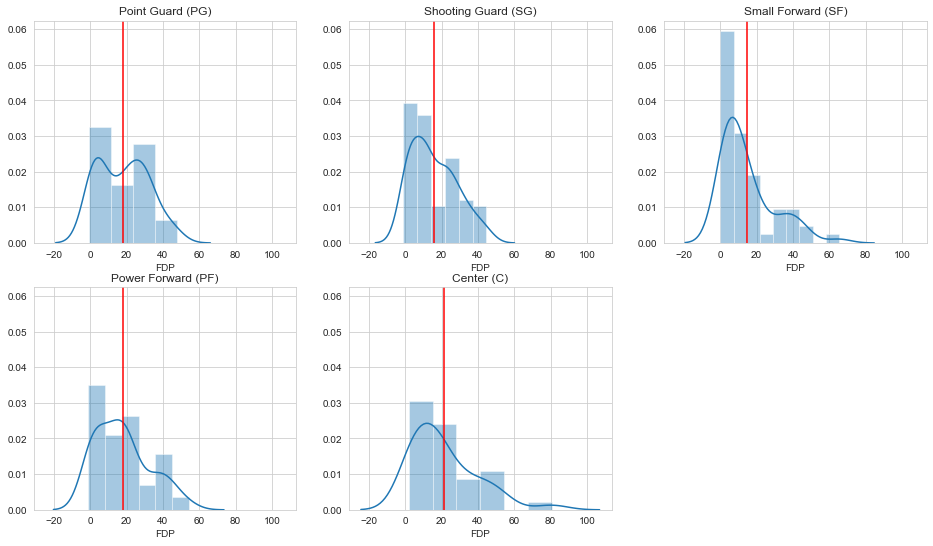

In [55]:
f = plt.figure(figsize=(16,9))

ax1 = f.add_subplot(2,3,1)
ax2 = f.add_subplot(2,3,2,sharex=ax1, sharey=ax1)
ax3 = f.add_subplot(2,3,3,sharex=ax1, sharey=ax1)
ax4 = f.add_subplot(2,3,4,sharex=ax1, sharey=ax1)
ax5 = f.add_subplot(2,3,5,sharex=ax1, sharey=ax1)

ax1.set_title('Point Guard (PG)')
sns.distplot(fantasy3[fantasy3.FD_pos=='PG'].FDP, label='PG',ax=ax1)
ax1.axvline(np.mean(fantasy3[fantasy3.FD_pos=='PG'].FDP),color='red', label='mean')

ax2.set_title('Shooting Guard (SG)')
sns.distplot(fantasy3[fantasy3.FD_pos=='SG'].FDP, label='SG',ax=ax2)
ax2.axvline(np.mean(fantasy3[fantasy3.FD_pos=='SG'].FDP),color='red', label='mean')

ax3.set_title('Small Forward (SF)')
sns.distplot(fantasy3[fantasy3.FD_pos=='SF'].FDP, label='SF',ax=ax3)
ax3.axvline(np.mean(fantasy3[fantasy3.FD_pos=='SF'].FDP),color='red', label='mean')

ax4.set_title('Power Forward (PF)')
sns.distplot(fantasy3[fantasy3.FD_pos=='PF'].FDP, label='PF',ax=ax4)
ax4.axvline(np.mean(fantasy3[fantasy3.FD_pos=='PF'].FDP),color='red', label='mean')

ax5.set_title('Center (C)')
sns.distplot(fantasy3[fantasy3.FD_pos=='C'].FDP, label='C',ax=ax5)
ax5.axvline(np.mean(fantasy3[fantasy3.FD_pos=='C'].FDP),color='red', label='mean')

plt.show()

# LINEAR MODELING


In [56]:
from pulp import *
prob = pulp.LpProblem('FantasyTeam', pulp.LpMaximize)

In [58]:
decision_variables = []
for rownum, row in fantasy3.iterrows():
    variable = str('x' + str(rownum))
    variable = pulp.LpVariable(str(variable), lowBound = 0, upBound = 1, cat= 'Integer') #make variables binary
    decision_variables.append(variable)

print ("Total number of decision_variables: " + str(len(decision_variables)))

Total number of decision_variables: 283


#Optimisation Function

In [59]:
total_points = ""
for rownum, row in fantasy3.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            formula = row['FDP']*player
            total_points += formula

prob += total_points
print ("Optimization function: " + str(total_points))

Optimization function: 37.5*x0 + 24.2*x1 + 21.5*x10 + 13.9*x100 + 10.2*x101 + 6.4*x102 + 1.2*x103 + 10.2*x104 + 34.9*x105 + 42.8*x106 + 5.5*x107 + 2.0*x108 + 10.7*x109 + 41.8*x11 + 4.2*x110 + 14.8*x111 + 15.5*x112 + 1.2*x113 + 11.2*x115 + 44.5*x116 + 9.1*x117 + 17.1*x118 + 4.4*x119 + 10.0*x12 + 2.7*x120 + 29.8*x121 + 1.2*x122 + 11.4*x123 + 31.8*x124 + 30.1*x125 + 15.8*x126 + 3.2*x127 + 6.2*x128 + 16.9*x130 + 30.4*x131 + 10.1*x132 + 28.5*x133 - 0.5*x134 + 31.5*x135 + 21.7*x136 + 22.6*x138 + 8.5*x139 + 5.9*x14 + 45.1*x140 + 10.6*x141 + 20.1*x142 + 13.2*x144 + 53.9*x145 + 43.2*x146 + 8.9*x147 + 11.8*x148 + 3.2*x149 + 21.4*x15 + 33.0*x150 + 4.5*x151 + 15.7*x152 + 19.4*x153 + 4.6*x154 + 15.8*x155 + 6.3*x156 + 44.6*x157 + x158 + 1.5*x159 + 4.4*x16 + 54.4*x160 + 2.9*x161 + 2.0*x162 + 10.2*x163 + 17.9*x164 + 28.8*x165 + 21.8*x166 + 22.4*x167 + 17.2*x168 + 11.0*x169 + 3.8*x17 + 47.5*x170 + 18.6*x171 + 47.7*x172 + 4.7*x173 + 31.8*x174 + 30.2*x175 + 20.3*x176 + 31.4*x177 + 22.2*x179 + 17.4*x18 + 

#Cash Constraint

In [60]:
avail_cash = 60000
total_cost = ""
for rownum, row in fantasy3.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            formula = row['FD_Sal']*player
            total_cost += formula

prob += (total_cost <= avail_cash)

# Player Constraints

#Point Guard

In [61]:
avail_PG = 2
total_PG = ""
for rownum, row in fantasy3.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            if row['FD_pos'] == 'PG':
                formula = 1*player
                total_PG += formula
prob += (total_PG == avail_PG)
print(total_PG)

x1 + x106 + x107 + x109 + x114 + x120 + x122 + x124 + x129 + x130 + x133 + x134 + x161 + x165 + x166 + x168 + x172 + x175 + x177 + x184 + x194 + x200 + x220 + x223 + x228 + x229 + x23 + x231 + x233 + x243 + x246 + x249 + x258 + x270 + x280 + x3 + x35 + x39 + x41 + x49 + x52 + x56 + x58 + x59 + x74 + x75 + x77 + x83 + x85 + x86 + x91


#Shooting Guard

In [62]:
avail_SG = 2
total_SG = ""
for rownum, row in fantasy3.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            if row['FD_pos'] == 'SG':
                formula = 1*player
                total_SG += formula
prob += (total_SG == avail_SG)
print(total_SG)

x10 + x101 + x123 + x13 + x131 + x132 + x135 + x137 + x138 + x143 + x144 + x15 + x153 + x157 + x158 + x162 + x163 + x169 + x171 + x174 + x179 + x180 + x182 + x189 + x204 + x206 + x21 + x213 + x219 + x221 + x226 + x227 + x230 + x234 + x237 + x24 + x244 + x247 + x248 + x252 + x255 + x256 + x257 + x26 + x260 + x263 + x265 + x266 + x268 + x269 + x27 + x272 + x274 + x276 + x28 + x31 + x37 + x40 + x43 + x44 + x45 + x46 + x53 + x54 + x60 + x61 + x64 + x7 + x70 + x76 + x8 + x81 + x82 + x87 + x88 + x90 + x99


#Small Forward

In [63]:
avail_SF = 2
total_SF = ""
for rownum, row in fantasy3.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            if row['FD_pos'] == 'SF':
                formula = 1*player
                total_SF += formula
prob += (total_SF == avail_SF)
print(total_SF)

x103 + x104 + x110 + x113 + x115 + x117 + x125 + x128 + x136 + x139 + x141 + x142 + x147 + x148 + x149 + x150 + x151 + x152 + x154 + x16 + x170 + x173 + x176 + x183 + x185 + x190 + x192 + x193 + x196 + x197 + x207 + x214 + x216 + x218 + x22 + x224 + x239 + x245 + x250 + x254 + x259 + x262 + x271 + x273 + x275 + x277 + x279 + x29 + x30 + x47 + x55 + x65 + x66 + x73 + x80 + x92 + x95 + x97


#Power Forward

In [64]:
avail_PF = 2
total_PF = ""
for rownum, row in fantasy3.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            if row['FD_pos'] == 'PF':
                formula = 1*player
                total_PF += formula
prob += (total_PF == avail_PF)
print(total_PF)

x0 + x100 + x108 + x11 + x111 + x112 + x116 + x12 + x121 + x126 + x127 + x140 + x146 + x156 + x159 + x160 + x164 + x167 + x178 + x18 + x187 + x191 + x195 + x2 + x203 + x205 + x208 + x209 + x212 + x215 + x217 + x222 + x225 + x232 + x236 + x238 + x240 + x241 + x242 + x251 + x264 + x267 + x283 + x32 + x34 + x36 + x42 + x48 + x5 + x57 + x6 + x62 + x63 + x67 + x68 + x78 + x79 + x84 + x89 + x9 + x96


#Center

In [65]:
avail_C = 1
total_C = ""
for rownum, row in fantasy3.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            if row['FD_pos'] == 'C':
                formula = 1*player
                total_C += formula
prob += (total_C == avail_C)
print(total_C)

x102 + x105 + x118 + x119 + x14 + x145 + x155 + x17 + x181 + x186 + x188 + x19 + x198 + x199 + x20 + x201 + x202 + x210 + x211 + x235 + x25 + x253 + x261 + x278 + x33 + x38 + x4 + x50 + x51 + x69 + x71 + x72 + x93 + x94 + x98


# Solving the problem

In [66]:
prob.writeLP('FantasyTeam.lp')
optimization_result = prob.solve()
assert optimization_result == pulp.LpStatusOptimal
print("Status:", LpStatus[prob.status])
print("Optimal Solution to the problem: ", value(prob.objective))
print ("Individual decision_variables: ")
for v in prob.variables():
	print(v.name, "=", v.varValue)

Status: Optimal
Optimal Solution to the problem:  452.1
Individual decision_variables: 
x0 = 0.0
x1 = 0.0
x10 = 0.0
x100 = 0.0
x101 = 0.0
x102 = 0.0
x103 = 0.0
x104 = 0.0
x105 = 0.0
x106 = 1.0
x107 = 0.0
x108 = 0.0
x109 = 0.0
x11 = 0.0
x110 = 0.0
x111 = 0.0
x112 = 0.0
x113 = 0.0
x114 = 0.0
x115 = 0.0
x116 = 0.0
x117 = 0.0
x118 = 0.0
x119 = 0.0
x12 = 0.0
x120 = 0.0
x121 = 0.0
x122 = 0.0
x123 = 0.0
x124 = 0.0
x125 = 0.0
x126 = 0.0
x127 = 0.0
x128 = 0.0
x129 = 0.0
x13 = 0.0
x130 = 0.0
x131 = 0.0
x132 = 0.0
x133 = 0.0
x134 = 0.0
x135 = 0.0
x136 = 0.0
x137 = 0.0
x138 = 0.0
x139 = 0.0
x14 = 0.0
x140 = 0.0
x141 = 0.0
x142 = 0.0
x143 = 0.0
x144 = 0.0
x145 = 0.0
x146 = 0.0
x147 = 0.0
x148 = 0.0
x149 = 0.0
x15 = 0.0
x150 = 0.0
x151 = 0.0
x152 = 0.0
x153 = 0.0
x154 = 0.0
x155 = 0.0
x156 = 0.0
x157 = 0.0
x158 = 0.0
x159 = 0.0
x16 = 0.0
x160 = 0.0
x161 = 0.0
x162 = 0.0
x163 = 0.0
x164 = 0.0
x165 = 0.0
x166 = 0.0
x167 = 0.0
x168 = 0.0
x169 = 0.0
x17 = 0.0
x170 = 0.0
x171 = 0.0
x172 = 1.0
x173 = 0.0


# Results

In [67]:
variable_name = []
variable_value = []

for v in prob.variables():
    variable_name.append(v.name)
    variable_value.append(v.varValue)

df = pd.DataFrame({'variable': variable_name, 'value': variable_value})
df = df.dropna()
df


,variable,value
0,x0,0.0
1,x1,0.0
2,x10,0.0
3,x100,0.0
4,x101,0.0
...,...,...
277,x95,0.0
278,x96,0.0
279,x97,0.0
280,x98,0.0


In [36]:
df.to_csv("optimization3.csv")

In [68]:
for rownum, row in df.iterrows():
    value = re.findall(r'\d+', row['variable'])
    df.loc[rownum, 'variable'] = int(value[0])

df

,variable,value
0,0,0.0
1,1,0.0
2,10,0.0
3,100,0.0
4,101,0.0
...,...,...
277,95,0.0
278,96,0.0
279,97,0.0
280,98,0.0


In [69]:
#append results
for rownum, row in fantasy3.iterrows():
    for results_rownum, results_row in df.iterrows():
        if rownum == results_row['variable']:
            fantasy3.loc[rownum, 'decision'] = results_row['value']

fantasy3[fantasy3.decision==1].FD_Sal.sum()
fantasy3[fantasy3.decision==1].FDP.sum()
final_df = fantasy3[fantasy3.decision==1].sort_values('FD_pos').head(10)
final_df


,Player_Name,Team,Win,Start,Minutes,FDP,DoubleD,FD_pos,pt,rb,as,st,bl,to,trey,fg,FGM,ft,FTM,ranking,FD_Sal,decision
210,Nikola_Jokic,den,Lose,1,39.750000,80.5,1,C,39,10,11,3,2,2,1,0,0,7-Jun,6,Top,11700,1.0
68,Draymond_Green,gsw,Win,1,25.833333,50.4,0,PF,8,7,16,2,2,2,2,6-Mar,3,0,0,Top,6200,1.0
191,Maxi_Kleber,dal,Win,1,30.200000,41.7,0,PF,18,6,1,1,4,0,4,9-Jun,6,2-Feb,2,Advanced,4500,1.0
106,Jalen_Brunson,dal,Win,1,27.283333,42.8,0,PG,27,4,8,0,0,1,2,0,0,1-Jan,1,Advanced,5400,1.0
172,Lonzo_Ball,nor,Lose,1,37.316667,47.7,1,PG,10,11,9,3,2,4,2,7-Mar,3,2-Feb,2,Advanced,6500,1.0
65,Dorian_Finney-Smith,dal,Win,1,28.533333,45.4,0,SF,22,7,4,2,1,0,4,13-Jul,7,4-Apr,4,Advanced,4800,1.0
92,Giannis_Antetokounmpo,mil,Win,1,30.566667,65.3,1,SF,30,19,9,1,1,7,1,0,0,16-Sep,9,Top,11500,1.0
26,Bruce_Brown,det,Win,0,37.950000,43.0,1,SG,19,10,8,0,0,0,3,10-Jul,7,2-Feb,2,Advanced,4900,1.0
256,Terence_Davis,tor,Win,0,28.383333,35.3,0,SG,31,4,1,0,0,2,6,0,0,2-Jan,1,Advanced,4000,1.0


In [70]:
cost = final_df['FD_Sal'].sum()
FD_Points = final_df['FDP'].sum()
print (f"The cost is: {cost} and the Total Predicted Points is {FD_Points}")
# print(' Predicted Points is: ' {FD_Points})

The cost is: 59500 and the Total Predicted Points is 452.09999999999997
